# AURORA 
In this Notebook we will demonstrate how to use the AURORA package to perform segmentation on cancer metastasis in brain MRI.

---
## Getting Started

#### This tutorial requires:

   - Python 3.10+
   
#### Optional but recommended:
   <!--CUDA 11.4+ (https://developer.nvidia.com/cuda-toolkit)-->
   - GPU with CUDA support and at least 8GB of VRAM (*otherwise CPU can be used*) 


In [1]:
# Installations
!pip install brainles_aurora matplotlib > /dev/null

%load_ext autoreload
%autoreload 2

Das System kann den angegebenen Pfad nicht finden.


If you installed the packages and requirments on your own machine, you can skip this section and start from the import section.

### Setup Colab environment (optional) 
Otherwise you can follow and execute the tutorial on your browser.
In order to start working on the notebook, click on the following button, this will open this page in the Colab environment and you will be able to execute the code on your own (*Google account required*).

<a target="_blank" href="https://colab.research.google.com/github/BrainLesion/tutorials/blob/main/AURORA/tutorial.ipynb">
  <img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/>
</a>

(EVA VERSION):
<a target="_blank" href="https://colab.research.google.com/github/evamariie/tutorials/blob/main/AURORA/tutorial.ipynb">
  <img src="https://colab.research.google.com/assets/colab-badge.svg" alt=""/>
</a>

Now that you are visualizing the notebook in Colab, run the next cell to install the packages we will use. There are few things you should follow in order to properly set the notebook up:
1. Warning: This notebook was not authored by Google. Click on 'Run anyway'.
1. When the installation commands are done, there might be "Restart runtime" button at the end of the output. Please, click it.

If you run the next cell in a Google Colab environment, it will **clone the 'tutorials' repository** in your google drive. This will create a **new folder** called "tutorials" in **your Google Drive**.
All generated file will be created/uploaded to your Google Drive respectively.

After the first execution of the next cell, you might receive some warnings and notifications, please follow these instructions:
   - 'Permit this notebook to access your Google Drive files?' Click on 'Yes', and select your account.
   - Google Drive for desktop wants to access your Google Account. Click on 'Allow'.

Afterwards the "tutorials" folder has been created. You can navigate it through the lefthand panel in Colab. You might also have received an email that informs you about the access on your Google Drive.

In [2]:
import sys

# Check if we are in google colab currently
try:
    import google.colab

    colabFlag = True
except ImportError as r:
    colabFlag = False

# Execute certain steps only if we are in a colab environment
if colabFlag:
    # Create a folder in your Google Drive
    from google.colab import drive

    drive.mount("/content/drive")
    # clone repository and set path
    !git clone https://github.com/BrainLesion/tutorials.git /content/drive/MyDrive/tutorials
    COLAB_BASE_PATH = "/content/drive/MyDrive/tutorials/AURORA/"
    sys.path.insert(0, BASE_PATH)

else:  # normal jupyter notebook environment
    BASE_PATH = "./"  # current working directory would be BraTs-Toolkit anyways if you are not in colab

### Imports

In [3]:
from brainles_aurora.inferer import AuroraInferer, AuroraInfererConfig
import nibabel as nib
import numpy as np
import torch
import utils  # local file

---

## Data

AURORA expects *preprocessed* input data as NIfTI file or NumPy Array (*preprocessed* meaning the files should be co-registerend, skullstripped and in SRI-24 space).

In this example we provide sample data from the [ASNR-MICCAI BraTS Brain Metastasis Challenge](https://www.synapse.org/#!Synapse:syn51156910/wiki/622553), which is already preprocessed in the `AURORA/data` folder in the form of 4 modalities of the same brain (T1, T1C, T2, FLAIR). To get an intuition of the data, one example slice of the 3D scans is visualized below.

For your own data:
If the data is *not* preprocessed yet, consider using our [BrainLes preprocessing](https://github.com/BrainLesion/preprocessing) package (or its predecessor [BraTS-Toolkit](https://github.com/neuronflow/BraTS-Toolkit)).


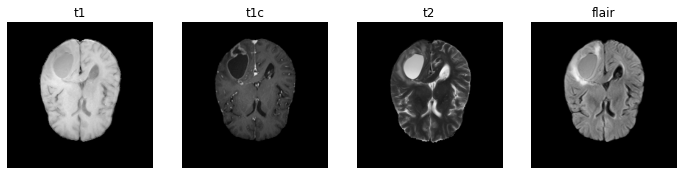

In [4]:
utils.visualize_data(f"{BASE_PATH}/data")

## Using AURORA

### Minimal example using default settings and only T1c as input

In [5]:
# We first need to create an instance of the AuroraInfererConfig class,
# which will hold the configuration for the inferer.
# We can then create an instance of the AuroraInferer class, which will be used to perform the inference.

config = AuroraInfererConfig(
    tta=False,
    # we disable test time augmentations for a quick demo
    # should be set to True for better results
    sliding_window_batch_size=4,
    # The batch size used for the sliding window inference
    # decrease if you run out of memory
    # warning: too small batches might lead to unstable results
    cuda_devices="0",  # optional, if you have multiple GPUs you can specify which one to use
    device="cpu",  # uncomment this line to force-use CPU
)


# Now that we have the configuration we can create an instance of the AuroraInferer class.
# This class will be used to perform the inference. We can then call the infer method to perform the inference.
inferer = AuroraInferer(config=config)

if torch.cuda.is_available() == False and colabFlag == True:
    raise RuntimeWarning(
        "You are not using any GPU in Colab! Go to 'Runtime'->'Change Runtime type' to select GPU usage!"
    )

# The infer method takes the path to the T1c MRI file and the path to the output segmentation file as arguments.
# The output segmentation file will be created by the infer method and
# will contain the segmentation of the input T1c MRI.

# The example below shows how to perform the inference using a T1c MRI file:
_ = inferer.infer(
    t1c=f"{BASE_PATH}/data/t1c.nii.gz",
    segmentation_file=f"{BASE_PATH}/output/t1c_segmentation.nii.gz",
)

# IMPORTANT: If this cell produces an OutOfMemoryError, you might not have enough VRAM (minimum 8GB).
# Try using the CPU instead by setting "useGPU" to False above

[INFO     | inferer         | L115  ] | 2024-03-14T00:46:43+0100: Initialized AuroraInferer with config: AuroraInfererConfig(log_level=20, device='cpu', cuda_devices='0', tta=False, sliding_window_batch_size=4, workers=0, threshold=0.5, sliding_window_overlap=0.5, crop_size=(192, 192, 32), model_selection=<ModelSelection.BEST: 'best'>)
[INFO     | inferer         | L148  ] | 2024-03-14T00:46:43+0100: Set torch device: cpu


─────────────────────────────────────────── Thank you for using AURORA ────────────────────────────────────────────

Please support our development by citing the papers listed here:

https://github.com/BrainLesion/AURORA#citation -- Thank you!

───────────────────────────────────────────────────────────────────────────────────────────────────────────────────

[INFO     | inferer         | L191  ] | 2024-03-14T00:46:43+0100: Infer with config: AuroraInfererConfig(log_level=20, device='cpu', cuda_devices='0', tta=False, sliding_window_batch_size=4, workers=0, threshold=0.5, sliding_window_overlap=0.5, crop_size=(192, 192, 32), model_selection=<ModelSelection.BEST: 'best'>) and device: cpu
[INFO     | data            | L138  ] | 2024-03-14T00:46:43+0100: Successfully validated input images (received 1). Input mode: NIFTI_FILEPATH
[INFO     | data            | L160  ] | 2024-03-14T00:46:43+0100: Received files: T1: False, T1C: True, T2: False, FLAIR: False
[INFO     | data            | L169  ] | 2024-03-14T00:46:43+0100: Inference mode: t1c-o
[INFO     | model           | L58   ] | 2024-03-14T00:46:43+0100: No loaded compatible model found (Switching from None to t1c-o). Loading Model and weights...
[INFO     | model           | L63   ] | 2024-03-14T00:46:43+0100: Successfully loaded model.
[INFO     | inferer         | L206  ] | 2024-03-14T00:

BasicUNet features: (32, 32, 64, 128, 256, 32).


[INFO     | model           | L205  ] | 2024-03-14T00:49:23+0100: Post-processing data
[INFO     | model           | L209  ] | 2024-03-14T00:49:23+0100: Returning post-processed data as Dict of Numpy arrays
[INFO     | inferer         | L218  ] | 2024-03-14T00:49:23+0100: Finished inference
[INFO     | inferer         | L222  ] | 2024-03-14T00:49:23+0100: Saving post-processed data as NIfTI files
[INFO     | data            | L263  ] | 2024-03-14T00:49:24+0100: Saved segmentation to .//output/t1c_segmentation.nii.gz
[INFO     | inferer         | L226  ] | 2024-03-14T00:49:24+0100: ============================ Finished inference run ============================


## Visualize results

The segementation comprise of the
- **metastasis label** (in blue), consiting of contrast-enhancing metastasis and necrosis
- T2-FLAIR hyperintense **edema label** (in red)  


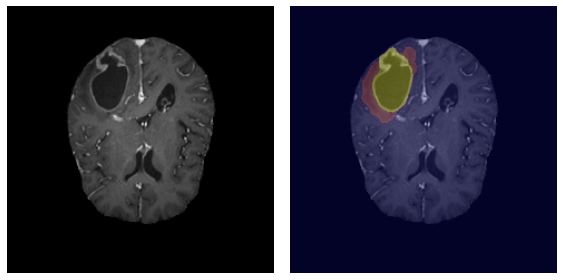

In [6]:
utils.visualize_segmentation(
    modality_file=f"{BASE_PATH}/data/t1c.nii.gz",
    segmentation_file=f"{BASE_PATH}/output/t1c_segmentation.nii.gz",
)

### Multiple input modalities and other available outputs

AURORA also supports different combinations of multi-modal MRI files [(see manuscript)](https://www.sciencedirect.com/science/article/pii/S016781402389795X). It will automatically select a suitable model depending on the inputs supplied.

- Any of the following combination of sequences can be supplied: 
    - T1-CE only
    - T1 only
    - T2-FLAIR only
    - T1-CE + T2-FLAIR
    - T1-CE + T1
    - T1-CE + T1 + T2-FLAIR
    - T1-CE + T1 + T2 + T2-FLAIR 
  
- For the last combination (with all 4 sequences), the [(vanilla model)](https://www.sciencedirect.com/science/article/pii/S0167814022045625) can also be used.

- Instead of only saving the final output consisting of one file with 2 labels, additional files with labels for the whole lesion (metastasis + edema) or the metastasis only can also be saved.

- Test-time augmentation can be enabled (tta parameter in config, default = True). Segmentation with TTA will take around 10 times longer than without TTA.



#### The example below shows how to perform the inference using multi-modal inputs.
*(This may take a while)*

In [7]:
# Instantiate the AuroraInferer
inferer = AuroraInferer()

inferer = AuroraInferer(config=config)

# Use all four input modalities,we also create other outputs and a custom log file
_ = inferer.infer(
    t1=f"{BASE_PATH}/data/t1.nii.gz",
    t1c=f"{BASE_PATH}/data/t1c.nii.gz",
    t2=f"{BASE_PATH}/data/t2.nii.gz",
    fla=f"{BASE_PATH}/data/flair.nii.gz",
    segmentation_file=f"{BASE_PATH}/output/multi-modal_segmentation.nii.gz",
    # The unbinarized network outputs for the whole tumor channel (edema + enhancing tumor core + necrosis) channel
    whole_tumor_unbinarized_floats_file=f"{BASE_PATH}/output/whole_tumor_unbinarized_floats.nii.gz",
    # The unbinarized network outputs for the metastasis (tumor core) channel
    metastasis_unbinarized_floats_file=f"{BASE_PATH}/output/metastasis_unbinarized_floats.nii.gz",
    log_file=f"{BASE_PATH}/output/custom_logfile.log",
)

[INFO     | inferer         | L115  ] | 2024-03-14T00:49:24+0100: Initialized AuroraInferer with config: AuroraInfererConfig(log_level=20, device=<Device.AUTO: 'auto'>, cuda_devices='0', tta=True, sliding_window_batch_size=1, workers=0, threshold=0.5, sliding_window_overlap=0.5, crop_size=(192, 192, 32), model_selection=<ModelSelection.BEST: 'best'>)
[INFO     | inferer         | L148  ] | 2024-03-14T00:49:24+0100: Set torch device: cpu
[INFO     | inferer         | L115  ] | 2024-03-14T00:49:24+0100: Initialized AuroraInferer with config: AuroraInfererConfig(log_level=20, device='cpu', cuda_devices='0', tta=False, sliding_window_batch_size=4, workers=0, threshold=0.5, sliding_window_overlap=0.5, crop_size=(192, 192, 32), model_selection=<ModelSelection.BEST: 'best'>)
[INFO     | inferer         | L148  ] | 2024-03-14T00:49:24+0100: Set torch device: cpu


─────────────────────────────────────────── Thank you for using AURORA ────────────────────────────────────────────

Please support our development by citing the papers listed here:

https://github.com/BrainLesion/AURORA#citation -- Thank you!

───────────────────────────────────────────────────────────────────────────────────────────────────────────────────

[INFO     | inferer         | L191  ] | 2024-03-14T00:49:24+0100: Infer with config: AuroraInfererConfig(log_level=20, device='cpu', cuda_devices='0', tta=False, sliding_window_batch_size=4, workers=0, threshold=0.5, sliding_window_overlap=0.5, crop_size=(192, 192, 32), model_selection=<ModelSelection.BEST: 'best'>) and device: cpu
[INFO     | data            | L138  ] | 2024-03-14T00:49:24+0100: Successfully validated input images (received 4). Input mode: NIFTI_FILEPATH
[INFO     | data            | L160  ] | 2024-03-14T00:49:24+0100: Received files: T1: True, T1C: True, T2: True, FLAIR: True
[INFO     | data            | L169  ] | 2024-03-14T00:49:24+0100: Inference mode: t1-t1c-t2-fla
[INFO     | model           | L58   ] | 2024-03-14T00:49:24+0100: No loaded compatible model found (Switching from None to t1-t1c-t2-fla). Loading Model and weights...
[INFO     | model           | L63   ] | 2024-03-14T00:49:24+0100: Successfully loaded model.
[INFO     | inferer         | L206  ] | 2

BasicUNet features: (32, 32, 64, 128, 256, 32).


[INFO     | model           | L205  ] | 2024-03-14T00:52:00+0100: Post-processing data
[INFO     | model           | L209  ] | 2024-03-14T00:52:00+0100: Returning post-processed data as Dict of Numpy arrays
[INFO     | inferer         | L218  ] | 2024-03-14T00:52:00+0100: Finished inference
[INFO     | inferer         | L222  ] | 2024-03-14T00:52:00+0100: Saving post-processed data as NIfTI files
[INFO     | data            | L263  ] | 2024-03-14T00:52:00+0100: Saved segmentation to .//output/multi-modal_segmentation.nii.gz
[INFO     | data            | L263  ] | 2024-03-14T00:52:00+0100: Saved whole_network to .//output/whole_tumor_unbinarized_floats.nii.gz
[INFO     | data            | L263  ] | 2024-03-14T00:52:00+0100: Saved metastasis_network to .//output/metastasis_unbinarized_floats.nii.gz
[INFO     | inferer         | L226  ] | 2024-03-14T00:52:00+0100: ============================ Finished inference run ============================


#### In case you have all 4 sequences (t1, t1c, t2, flair) available, you may also use the [(vanilla model)](https://www.sciencedirect.com/science/article/pii/S0167814022045625). 


<!-- Therefore, run the cell below. 

#TODO code vanilla model -->

### NumPy Inputs/ Outputs

In [8]:
config = AuroraInfererConfig()

# AuroraInferer(config=config)
# If you do not have a GPU that supports CUDA use the CPU version (uncomment the line above, comment the GPU inferer)
inferer = AuroraInferer(config=config)

# we load the nifty data to a numpy array
t1_np = nib.load(f"{BASE_PATH}/data/t1.nii.gz").get_fdata()

# we can now use the inferer to perform the inference and obtain again a numpy array containing the segmentation
results = inferer.infer(t1=t1_np)
print([f"{k} : {v.shape}" for k, v in results.items()])

[INFO     | inferer         | L115  ] | 2024-03-14T00:52:00+0100: Initialized AuroraInferer with config: AuroraInfererConfig(log_level=20, device=<Device.AUTO: 'auto'>, cuda_devices='0', tta=True, sliding_window_batch_size=1, workers=0, threshold=0.5, sliding_window_overlap=0.5, crop_size=(192, 192, 32), model_selection=<ModelSelection.BEST: 'best'>)
[INFO     | inferer         | L148  ] | 2024-03-14T00:52:00+0100: Set torch device: cpu


─────────────────────────────────────────── Thank you for using AURORA ────────────────────────────────────────────

Please support our development by citing the papers listed here:

https://github.com/BrainLesion/AURORA#citation -- Thank you!

───────────────────────────────────────────────────────────────────────────────────────────────────────────────────

[INFO     | inferer         | L191  ] | 2024-03-14T00:52:00+0100: Infer with config: AuroraInfererConfig(log_level=20, device=<Device.AUTO: 'auto'>, cuda_devices='0', tta=True, sliding_window_batch_size=1, workers=0, threshold=0.5, sliding_window_overlap=0.5, crop_size=(192, 192, 32), model_selection=<ModelSelection.BEST: 'best'>) and device: cpu
[INFO     | data            | L138  ] | 2024-03-14T00:52:00+0100: Successfully validated input images (received 1). Input mode: NP_NDARRAY
[INFO     | data            | L160  ] | 2024-03-14T00:52:00+0100: Received files: T1: True, T1C: False, T2: False, FLAIR: False
[INFO     | data            | L169  ] | 2024-03-14T00:52:00+0100: Inference mode: t1-o
[INFO     | model           | L58   ] | 2024-03-14T00:52:00+0100: No loaded compatible model found (Switching from None to t1-o). Loading Model and weights...


BasicUNet features: (32, 32, 64, 128, 256, 32).


[INFO     | model           | L63   ] | 2024-03-14T00:52:01+0100: Successfully loaded model.
[INFO     | inferer         | L206  ] | 2024-03-14T00:52:01+0100: Setting up Dataloader
[INFO     | inferer         | L216  ] | 2024-03-14T00:52:01+0100: Running inference on device := cpu
[INFO     | model           | L201  ] | 2024-03-14T00:54:27+0100: Applying test time augmentations
[INFO     | model           | L205  ] | 2024-03-14T01:23:19+0100: Post-processing data
[INFO     | model           | L209  ] | 2024-03-14T01:23:19+0100: Returning post-processed data as Dict of Numpy arrays
[INFO     | inferer         | L218  ] | 2024-03-14T01:23:19+0100: Finished inference
[INFO     | inferer         | L226  ] | 2024-03-14T01:23:19+0100: ============================ Finished inference run ============================


['segmentation : (240, 240, 155)', 'whole_network : (240, 240, 155)', 'metastasis_network : (240, 240, 155)']


#### Example of application

In [9]:
# Now we can use the capabilities of numpy without having to re-read a nifti file.
# For example we could compute the number of metastasis voxels (the volume of the metastasis) as follows:

whole_metastasis_voxels = results["segmentation"] > 0
print("metasis volume (including edema)", np.count_nonzero(whole_metastasis_voxels))

metasis volume (including edema) 93711
